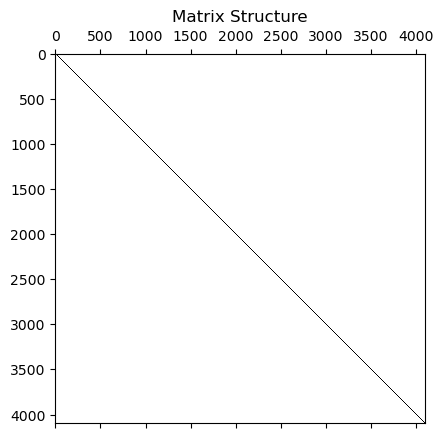

[[-40.96  10.24   0.   ...   0.     0.     0.  ]
 [ 10.24 -40.96  10.24 ...   0.     0.     0.  ]
 [  0.    10.24 -40.96 ...   0.     0.     0.  ]
 ...
 [  0.     0.     0.   ... -40.96  10.24   0.  ]
 [  0.     0.     0.   ...  10.24 -40.96  10.24]
 [  0.     0.     0.   ...   0.    10.24 -40.96]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

m = 64    # N value in x and y directions
n = m * m  # total size of matrix
dx = 20 / m

e0 = np.zeros((n, 1))  # vector of zeros
e1 = np.ones((n, 1))   # vector of ones
e2 = np.copy(e1)    # copy the one vector
e4 = np.copy(e0)    # copy the zero vector

for j in range(1, m+1):
    e2[m*j-1] = 0  # overwrite every m^th value with zero
    e4[m*j-1] = 1  # overwirte every m^th value with one

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]

e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

# Place diagonal elements
diagonals = [e1.flatten(), e1.flatten(), e5.flatten(), 
             e2.flatten(), -4 * e1.flatten(), e3.flatten(), 
             e4.flatten(), e1.flatten(), e1.flatten()]
offsets = [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)]

matA = spdiags(diagonals, offsets, n, n).toarray()

matA /= dx**2
A = matA

# Plot matrix structure
plt.figure(5)
plt.spy(matA)
plt.title('Matrix Structure')
plt.show()
print(matA)
S=A


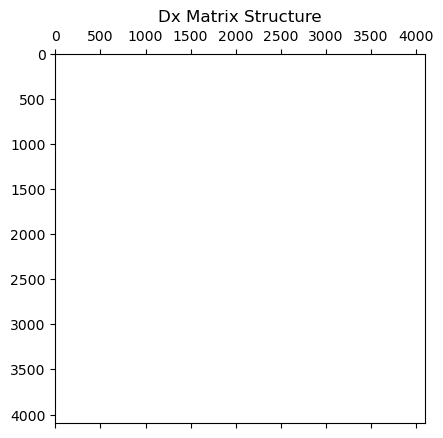

Dx matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of Dx: (4096, 4096)


In [2]:
e1 = np.ones((n, 1))   # vector of ones

# dx matrix (finite differences across columns, vertical neighbors)
dx_diagonals = [e1.flatten(), -e1.flatten(), e1.flatten(), -e1.flatten()]
dx_offsets = [-(n-m), -m, m, n - m]
dxmat = spdiags(dx_diagonals, dx_offsets, n, n).toarray() 

dxmat /= 2*dx

# Plot Dx matrix structure
plt.figure()
plt.spy(dxmat)
plt.title('Dx Matrix Structure')
plt.show()

# Print Dx matrix and its shape
print("Dx matrix:")
# Print the matrix
print(dxmat)
print("Shape of Dx:", dxmat.shape)

B = dxmat

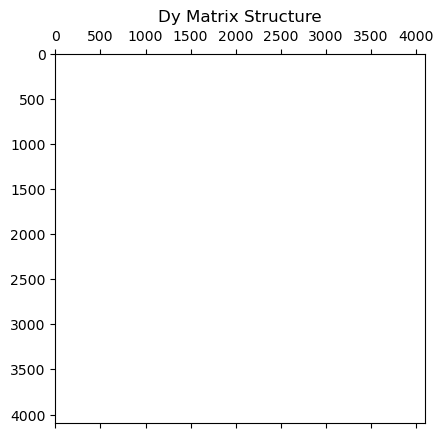

Dy matrix:
[[ 0.   1.6  0.  ...  0.   0.   0. ]
 [-1.6  0.   1.6 ...  0.   0.   0. ]
 [ 0.  -1.6  0.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.   1.6  0. ]
 [ 0.   0.   0.  ... -1.6  0.   1.6]
 [ 0.   0.   0.  ...  0.  -1.6  0. ]]
Shape of Dy: (4096, 4096)


In [3]:
e0 = np.zeros((n, 1))  # vector of zeros
e1 = np.ones((n, 1))   # vector of ones
e2 = np.copy(e1)    # copy the one vector
e4 = np.copy(e0)    # copy the zero vector

for j in range(1, m+1):
    e2[m*j-1] = 0  # overwrite every m^th value with zero
    e4[m*j-1] = 1  # overwirte every m^th value with one

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]

e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

# dy matrix 
dy_diagonals = [e5.flatten(), -e2.flatten(), e3.flatten(), -e4.flatten()]
dy_offsets = [-m+1, -1, 1, m-1]
dymat = spdiags(dy_diagonals, dy_offsets, n, n).toarray() 

dymat /= 2*dx

# Plot Dy matrix structure
plt.figure()
plt.spy(dymat)
plt.title('Dy Matrix Structure')
plt.show()

# Print Dy matrix and its shape
print("Dy matrix:")
# Print the matrix
print(dymat)
print("Shape of Dy:", dymat.shape)

C = dymat

 Time: 0.97 seconds
size wtsol (4096, 9)
[[2.50656748e-46 3.54893701e-45 1.85745717e-44 ... 1.85384595e-42
  4.67417958e-42 1.10918770e-41]
 [1.17762859e-43 6.53684666e-43 2.62032713e-42 ... 1.58954196e-40
  3.55994681e-40 7.45536774e-40]
 [4.55107657e-41 1.93087628e-40 6.43608612e-40 ... 2.49019716e-38
  5.07450760e-38 9.69262315e-38]
 ...
 [1.96785570e-38 1.23636238e-37 5.46949973e-37 ... 4.35894300e-35
  1.02319688e-34 2.22797769e-34]
 [6.19028421e-41 5.34124949e-40 2.93842095e-39 ... 3.68802103e-37
  9.45257062e-37 2.23317639e-36]
 [1.60178709e-43 1.99879166e-42 1.41262426e-41 ... 2.80602636e-39
  7.96346159e-39 2.07361555e-38]]


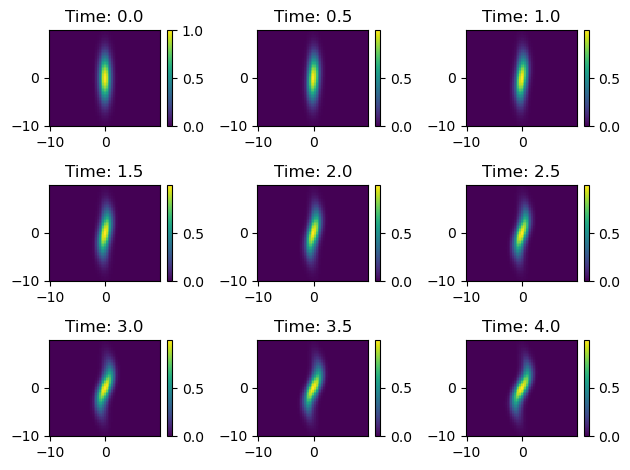

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2
from scipy.integrate import solve_ivp
import time

# Define parameters
tspan = np.arange(0, 4.5, 0.5)
nu = 0.001
Lx, Ly = 20, 20
nx, ny = 64, 64
N = nx * ny

# Define spatial domain and initial conditions
x2 = np.linspace(-Lx/2, Lx/2, nx + 1)
x = x2[:nx]
y2 = np.linspace(-Ly/2, Ly/2, ny + 1)
y = y2[:ny]
X, Y = np.meshgrid(x, y)
w = 1 * np.exp(-X**2 - Y**2 / 20) # + 1j * np.zeros((nx, ny))  # Initialize as complex

# Define spectral k values
kx = (2 * np.pi / Lx) * np.concatenate((np.arange(0, nx/2), np.arange(-nx/2, 0)))
kx[0] = 1e-6
ky = (2 * np.pi / Ly) * np.concatenate((np.arange(0, ny/2), np.arange(-ny/2, 0)))
ky[0] = 1e-6
KX, KY = np.meshgrid(kx, ky)
K = KX**2 + KY**2

def spc_rhs(t, wt2, nu, A, B, C):
    wt = wt2.reshape((nx, ny)) 
    psit = np.real(ifft2(fft2(-wt)/K))

    psit = psit.flatten()
    wt = wt.flatten()
    
    rhs = (nu * A.dot(wt)) - (B.dot(psit))*(C.dot(wt)) + (B.dot(wt))*(C.dot(psit)) #.reshape(N)  # RHS of ODE
    #return np.hstack([np.real(rhs),np.imag(rhs)])
    return rhs

# Solve the ODE and plot the results
#wt0= np.hstack([np.real(fft2(w).reshape(N)),np.imag(fft2(w).reshape(N))])
wt0 = w.flatten()
start_time = time.time()
wtsol = solve_ivp(spc_rhs, (tspan[0], tspan[-1]), wt0, method='RK45', t_eval=tspan, args=(nu, A, B, C))
wtsol = wtsol.y
end_time = time.time()
print(f' Time: {end_time-start_time:.2f} seconds')
print("size wtsol", wtsol.shape)
print(wtsol)
A1 = wtsol

for j, t in enumerate(tspan):
    #w1 = wtsol.reshape((nx, ny, 9))
    w1 = wtsol[:,j].reshape((nx, ny))
    plt.subplot(3, 3, j + 1)
    plt.pcolor(X, Y, w1, shading='auto')
    plt.title(f'Time: {t}')
    plt.colorbar()

plt.tight_layout()
plt.show()

 Time: 19.12 seconds
size wtsol (4096, 9)
[[ 2.50656748e-46 -1.78630705e-36  1.02614869e-36 ... -5.75086257e-26
  -6.68013806e-25  3.02201851e-24]
 [ 1.17762859e-43 -2.26093387e-29  1.85614646e-29 ... -1.48306461e-19
  -7.82424220e-19  1.67449651e-18]
 [ 4.55107657e-41 -4.24661881e-29  3.48720993e-29 ... -2.20165937e-20
  -2.91637720e-19  1.23961335e-18]
 ...
 [ 1.96785570e-38  7.20814729e-28 -6.58759786e-28 ...  4.01674620e-20
   1.34371413e-19 -8.94163775e-19]
 [ 6.19028421e-41  1.69117621e-28 -1.49205998e-28 ...  3.00460834e-20
   1.76009486e-19 -9.80736832e-19]
 [ 1.60178709e-43  5.05834665e-29 -4.38046443e-29 ...  2.47633369e-20
   1.15181522e-20  3.12761254e-20]]


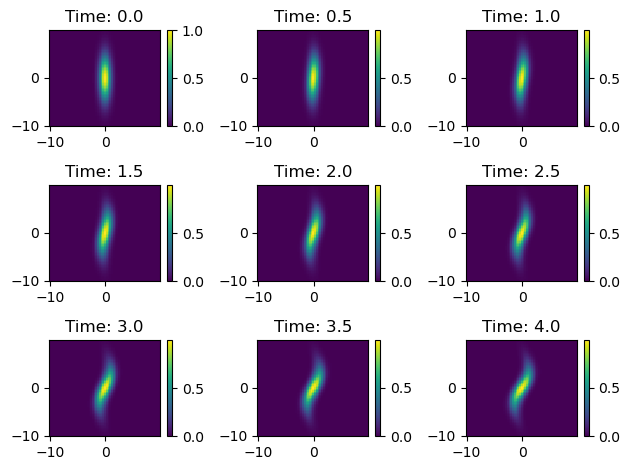

In [5]:
matA[0,0]=2
matA[0,0] /= dx**2
A = matA


def solv_rhs(t, wt2, nu, A, B, C):
    psit = np.linalg.solve(A, wt2)
    psit = psit.flatten()
    rhs = (nu * A.dot(wt2)) - (B.dot(psit))*(C.dot(wt2)) + (B.dot(wt2))*(C.dot(psit))  # RHS of ODE
    return rhs

# Solve the ODE and plot the results
wt0 = w.flatten()
start_time = time.time()
wtsol = solve_ivp(solv_rhs, (tspan[0], tspan[-1]), wt0, method='RK45', t_eval=tspan, args=(nu, A, B, C))
wtsol = wtsol.y
end_time = time.time()
print(f' Time: {end_time-start_time:.2f} seconds')
print("size wtsol", wtsol.shape)
print(wtsol)
A2 = wtsol

for j, t in enumerate(tspan):
    #w1 = wtsol.reshape((nx, ny, 9))
    w1 = wtsol[:,j].reshape((nx, ny))
    plt.subplot(3, 3, j + 1)
    plt.pcolor(X, Y, w1, shading='auto')
    plt.title(f'Time: {t}')
    plt.colorbar()

plt.tight_layout()
plt.show()

 Time: 1.86 seconds
size wtsol (4096, 9)
[[ 2.50656748e-46 -1.78630705e-36  1.02614869e-36 ... -5.75086257e-26
  -6.68013806e-25  3.02201851e-24]
 [ 1.17762859e-43 -2.26093387e-29  1.85614646e-29 ... -1.48306461e-19
  -7.82424220e-19  1.67449651e-18]
 [ 4.55107657e-41 -4.24661881e-29  3.48720993e-29 ... -2.20165937e-20
  -2.91637720e-19  1.23961335e-18]
 ...
 [ 1.96785570e-38  7.20814729e-28 -6.58759786e-28 ...  4.01674620e-20
   1.34371413e-19 -8.94163775e-19]
 [ 6.19028421e-41  1.69117621e-28 -1.49205998e-28 ...  3.00460834e-20
   1.76009486e-19 -9.80736832e-19]
 [ 1.60178709e-43  5.05834665e-29 -4.38046443e-29 ...  2.47633369e-20
   1.15181522e-20  3.12761254e-20]]


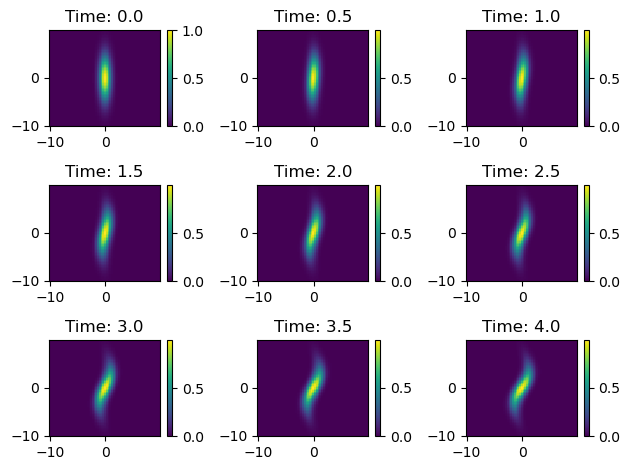

In [6]:
from scipy.linalg import lu, solve_triangular

P, L, U = lu(A)
 
def solv_rhs(t, wt2, nu, P, L, U, A, B, C):
    #wt = wt2.reshape((nx, ny))  # Reshape to grid
    #wt = wt.flatten()  # Flatten for matrix operations

    # Solve A * psit = wt using LU decomposition
    Pb = np.dot(P, wt2)
    y = solve_triangular(L, Pb, lower=True)
    psit = solve_triangular(U, y)

    # Compute the RHS of the vorticity equation
    rhs = (nu * A.dot(wt2)) - (B.dot(psit)) * (C.dot(wt2)) + (B.dot(wt2)) * (C.dot(psit))

    return rhs


# Solve the ODE and plot the results
start_time = time.time()
wt0 = w.flatten()
wtsol = solve_ivp(solv_rhs, (tspan[0], tspan[-1]), wt0, method='RK45', t_eval=tspan, args=(nu, P, L, U, A, B, C))
wtsol = wtsol.y
end_time = time.time()
print(f' Time: {end_time-start_time:.2f} seconds')
print("size wtsol", wtsol.shape)
print(wtsol)
A3 = wtsol

for j, t in enumerate(tspan):
    #w1 = wtsol.reshape((nx, ny, 9))
    w1 = wtsol[:,j].reshape((nx, ny))
    plt.subplot(3, 3, j + 1)
    plt.pcolor(X, Y, w1, shading='auto')
    plt.title(f'Time: {t}')
    plt.colorbar()

plt.tight_layout()
plt.show()

C:\Users\marap\AppData\Local\Temp\ipykernel_42304\2784765636.py:23: DeprecationWarning: 'scipy.sparse.linalg.bicgstab' keyword argument `tol` is deprecated in favor of `rtol` and will be removed in SciPy v1.14.0. Until then, if set, it will override `rtol`.
  psit, info = bicgstab(A_sparse, wt2, tol=1e-6, maxiter=500, callback=callback, M=P)


BiCGStab Total Time: 1.60 seconds


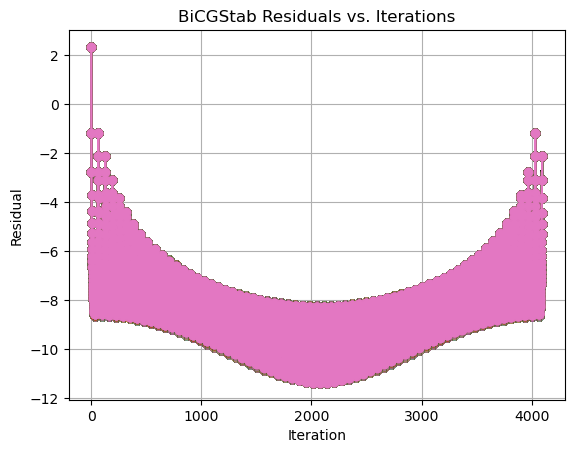

In [7]:
from scipy.sparse.linalg import bicgstab, LinearOperator
import numpy as np
from scipy.sparse import csr_matrix
import time
import matplotlib.pyplot as plt

# Convert to sparse matrix once
A_sparse = csr_matrix(A)

# Define Jacobi preconditioner
M = np.reciprocal(A_sparse.diagonal())
def preconditioner(vec):
    return M * vec
P = LinearOperator(A_sparse.shape, preconditioner)

# BiCGStab with residual tracking and preconditioning
def sol_bicgstab(t, wt2, nu, A_sparse, B, C, P):
    global bicgstab_residuals

    def callback(residual):
        bicgstab_residuals.append(residual)

    psit, info = bicgstab(A_sparse, wt2, tol=1e-6, maxiter=500, callback=callback, M=P)

    if info != 0:
        print(f"Warning: BiCGStab did not converge (info={info})")

    psit = np.array(psit).flatten()
    rhs = (nu * A_sparse.dot(wt2)) - (B.dot(psit)) * (C.dot(wt2)) + (B.dot(wt2)) * (C.dot(psit))
    return rhs

# Initialize residual tracking and runtime measurement
bicgstab_residuals = []
start_time = time.time()

# Solve using BiCGStab
wt0 = w.flatten()
wtsol_bicgstab = solve_ivp(
    sol_bicgstab,
    (tspan[0], tspan[-1]),
    wt0,
    method="RK45",
    t_eval=tspan,
    args=(nu, A_sparse, B, C, P),
)

end_time = time.time()

# Compute total runtime
bicgstab_runtime = end_time - start_time
print(f"BiCGStab Total Time: {bicgstab_runtime:.2f} seconds")

# Plot residuals
plt.figure()
plt.plot(np.array(bicgstab_residuals).T, marker="o")
plt.title("BiCGStab Residuals vs. Iterations")
plt.xlabel("Iteration")
plt.ylabel("Residual")
plt.grid()
plt.show()

C:\Users\marap\AppData\Local\Temp\ipykernel_42304\2389095504.py:23: DeprecationWarning: scipy.sparse.linalg.gmres called without specifying `callback_type`. The default value will be changed in a future release. For compatibility, specify a value for `callback_type` explicitly, e.g., ``gmres(..., callback_type='pr_norm')``, or to retain the old behavior ``gmres(..., callback_type='legacy')``
  psit, info = gmres(A_sparse, wt2, tol=1e-6, restart=50, maxiter=500, M=P, callback=callback)
C:\Users\marap\AppData\Local\Temp\ipykernel_42304\2389095504.py:23: DeprecationWarning: 'scipy.sparse.linalg.gmres' keyword argument `tol` is deprecated in favor of `rtol` and will be removed in SciPy v1.14.0. Until then, if set, it will override `rtol`.
  psit, info = gmres(A_sparse, wt2, tol=1e-6, restart=50, maxiter=500, M=P, callback=callback)


GMRES Total Time: 9.18 seconds


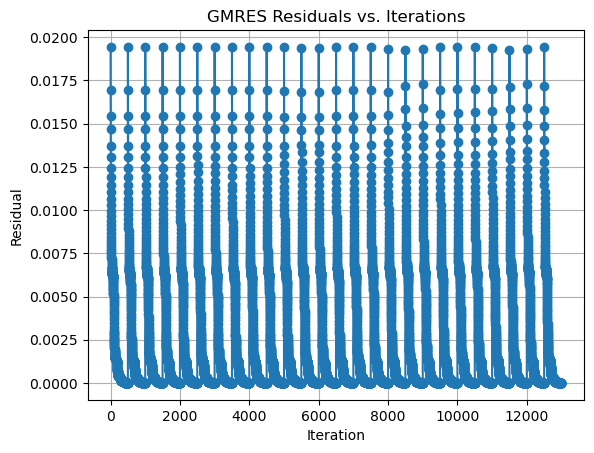

In [8]:
from scipy.sparse.linalg import gmres, LinearOperator
import numpy as np
from scipy.sparse import csr_matrix
import time
import matplotlib.pyplot as plt

# Convert A to a sparse matrix once
A_sparse = csr_matrix(A)

# Define Jacobi preconditioner
M = np.reciprocal(A_sparse.diagonal())
def preconditioner(vec):
    return M * vec
P = LinearOperator(A_sparse.shape, preconditioner)

# GMRES with residual tracking and preconditioning
def sol_gmres(t, wt2, nu, A_sparse, B, C, P):
    global gmres_residuals  # Keep track of residuals during iterations

    def callback(residual_norm):
        gmres_residuals.append(residual_norm)

    psit, info = gmres(A_sparse, wt2, tol=1e-6, restart=50, maxiter=500, M=P, callback=callback)

    # if info != 0:
    #     print(f"Warning: GMRES did not converge (info={info})")

    psit = np.array(psit).flatten()
    rhs = (nu * A_sparse.dot(wt2)) - (B.dot(psit)) * (C.dot(wt2)) + (B.dot(wt2)) * (C.dot(psit))
    return rhs

# Initialize residual tracking and runtime measurement
gmres_residuals = []
start_time = time.time()

# Solve using GMRES
wt0 = w.flatten()
wtsol_gmres = solve_ivp(
    sol_gmres,
    (tspan[0], tspan[-1]),
    wt0,
    method="RK45",
    t_eval=tspan,
    args=(nu, A_sparse, B, C, P),
)

end_time = time.time()

# Compute total runtime
gmres_runtime = end_time - start_time
print(f"GMRES Total Time: {gmres_runtime:.2f} seconds")

# Plot residuals
plt.figure()
plt.plot(np.array(gmres_residuals).T, marker="o")
plt.title("GMRES Residuals vs. Iterations")
plt.xlabel("Iteration")
plt.ylabel("Residual")
plt.grid()
plt.show()


 Time: 0.76 seconds
size wtsol (4096, 9)


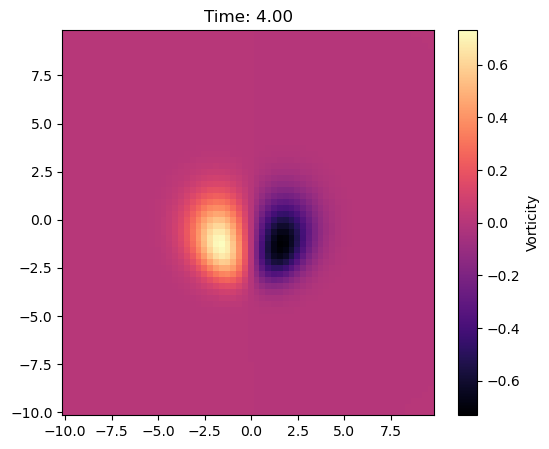

In [9]:
# For context, I have 4 different initial conditions but just one block of plotting code. 
# The figures attached on github are different images using each initial condition using the
# plotting code below with a different number at the end of the title of each image. :3

# Two oppositely charged Gaussian vortices
x1, y1 = -1, 0  # Center of the first vortex
x2, y2 = 1, 0   # Center of the second vortex
amp1, amp2 = 1, -1  # Opposite charges

# Two same-charged Gaussian vortices
# x1, y1 = -2, 0  # Center of the first vortex
# x2, y2 = 2, 0   # Center of the second vortex
# amp1, amp2 = 2, 2  # Same charges

w = (amp1 * np.exp(-((X - x1)**2 + (Y - y1)**2) / 4) + 
     amp2 * np.exp(-((X - x2)**2 + (Y - y2)**2) / 4))

# # Two pairs of oppositely charged Gaussian vortices
# x1, y1 = -2, 2  # Center of the first vortex
# x2, y2 = 2, 2   # Center of the second vortex
# x3, y3 = -2, -2  # Center of the third vortex
# x4, y4 = 2, -2   # Center of the fourth vortex
# amp1, amp2, amp3, amp4 = 1, -1, -1, 1  # Opposite charges

# w = (amp1 * np.exp(-((X - x1)**2 + (Y - y1)**2) / 4) + 
#      amp2 * np.exp(-((X - x2)**2 + (Y - y2)**2) / 4) +
#      amp3 * np.exp(-((X - x3)**2 + (Y - y3)**2) / 4) +
#      amp4 * np.exp(-((X - x4)**2 + (Y - y4)**2) / 4))

# # Random assortment of vortices
# np.random.seed(42)  # For reproducibility
# num_vortices = 15
# amps = np.random.uniform(-1, 1, num_vortices)  # Random amplitudes (charges)
# x_centers = np.random.uniform(-Lx/2, Lx/2, num_vortices)  # Random x positions
# y_centers = np.random.uniform(-Ly/2, Ly/2, num_vortices)  # Random y positions
# ellipticities = np.random.uniform(0.5, 2, num_vortices)  # Random ellipticity factors

# for i in range(num_vortices):
#     xc, yc, amp, ell = x_centers[i], y_centers[i], amps[i], ellipticities[i]
#     w += amp * np.exp(-((X - xc)**2 + ell * (Y - yc)**2) / 4)

def spc_rhs(t, wt2, nu, A, B, C):
    wt = wt2.reshape((nx, ny)) 
    psit = np.real(ifft2(fft2(-wt)/K))

    psit = psit.flatten()
    wt = wt.flatten()
    
    rhs = (nu * A.dot(wt)) - (B.dot(psit))*(C.dot(wt)) + (B.dot(wt))*(C.dot(psit)) #.reshape(N)  # RHS of ODE
    #return np.hstack([np.real(rhs),np.imag(rhs)])
    return rhs

# Solve the ODE and plot the results
wt0 = w.flatten()
start_time = time.time()
wtsol = solve_ivp(spc_rhs, (tspan[0], tspan[-1]), wt0, method='RK45', t_eval=tspan, args=(nu, A, B, C))
wtsol = wtsol.y
end_time = time.time()
print(f' Time: {end_time-start_time:.2f} seconds')
print("size wtsol", wtsol.shape)


import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.pcolor(X, Y, wtsol[:, 0].reshape((nx, ny)), shading='auto', cmap='magma')
fig.colorbar(cax, ax=ax, label="Vorticity")
title = ax.set_title(f"Time: {tspan[0]:.2f}")

# Function to update the plot at each frame
def update(frame):
    w1 = wtsol[:, frame].reshape((nx, ny))
    cax.set_array(w1.ravel())  # Update the data for pcolor
    title.set_text(f"Time: {tspan[frame]:.2f}")
    return cax, title

# Create the animation
ani = FuncAnimation(
    fig, update, frames=len(tspan), interval=200, blit=False
)

# Save or display the animation
ani.save('vorticity_evolution1.gif', writer=PillowWriter(fps=5))
plt.show()
